In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("="*50)
print("TASK 1: LOAD AND EXPLORE THE DATASET")
print("="*50)

try:
    iris = load_iris()
    df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
    df['species'] = iris.target
    df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
    
    print("Dataset loaded successfully!")
    print(f"Dataset shape: {df.shape}")
    
    print("\nFirst 5 rows of the dataset:")
    print(df.head())
    
    print("\nDataset information:")
    print(df.info())
    
    print("\nMissing values in each column:")
    print(df.isnull().sum())
    
    if df.isnull().sum().sum() > 0:
        print("\nCleaning dataset...")
        for col in df.columns:
            if df[col].dtype in ['int64', 'float64']:
                df[col].fillna(df[col].mean(), inplace=True)
            else:
                df[col].fillna(df[col].mode()[0], inplace=True)
        print("Missing values handled!")
    else:
        print("\nNo missing values found - dataset is clean!")
        
except Exception as e:
    print(f"Error loading dataset: {e}")

TASK 1: LOAD AND EXPLORE THE DATASET
Dataset loaded successfully!
Dataset shape: (150, 5)

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal leng

In [2]:
print("\n" + "="*50)
print("TASK 2: BASIC DATA ANALYSIS")
print("="*50)

print("Basic statistics for numerical columns:")
print(df.describe())

print("\nMean values by species:")
species_means = df.groupby('species').mean()
print(species_means)

print("\nInteresting findings:")
print(f"1. Setosa has the smallest petal dimensions")
print(f"2. Virginica has the largest sepal and petal dimensions")
print(f"3. Versicolor is intermediate in most measurements")


TASK 2: BASIC DATA ANALYSIS
Basic statistics for numerical columns:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  

Mean values by species:
            sepal length (cm)  sepal width (cm)  petal length (cm)  \
species         


TASK 3: DATA VISUALIZATION


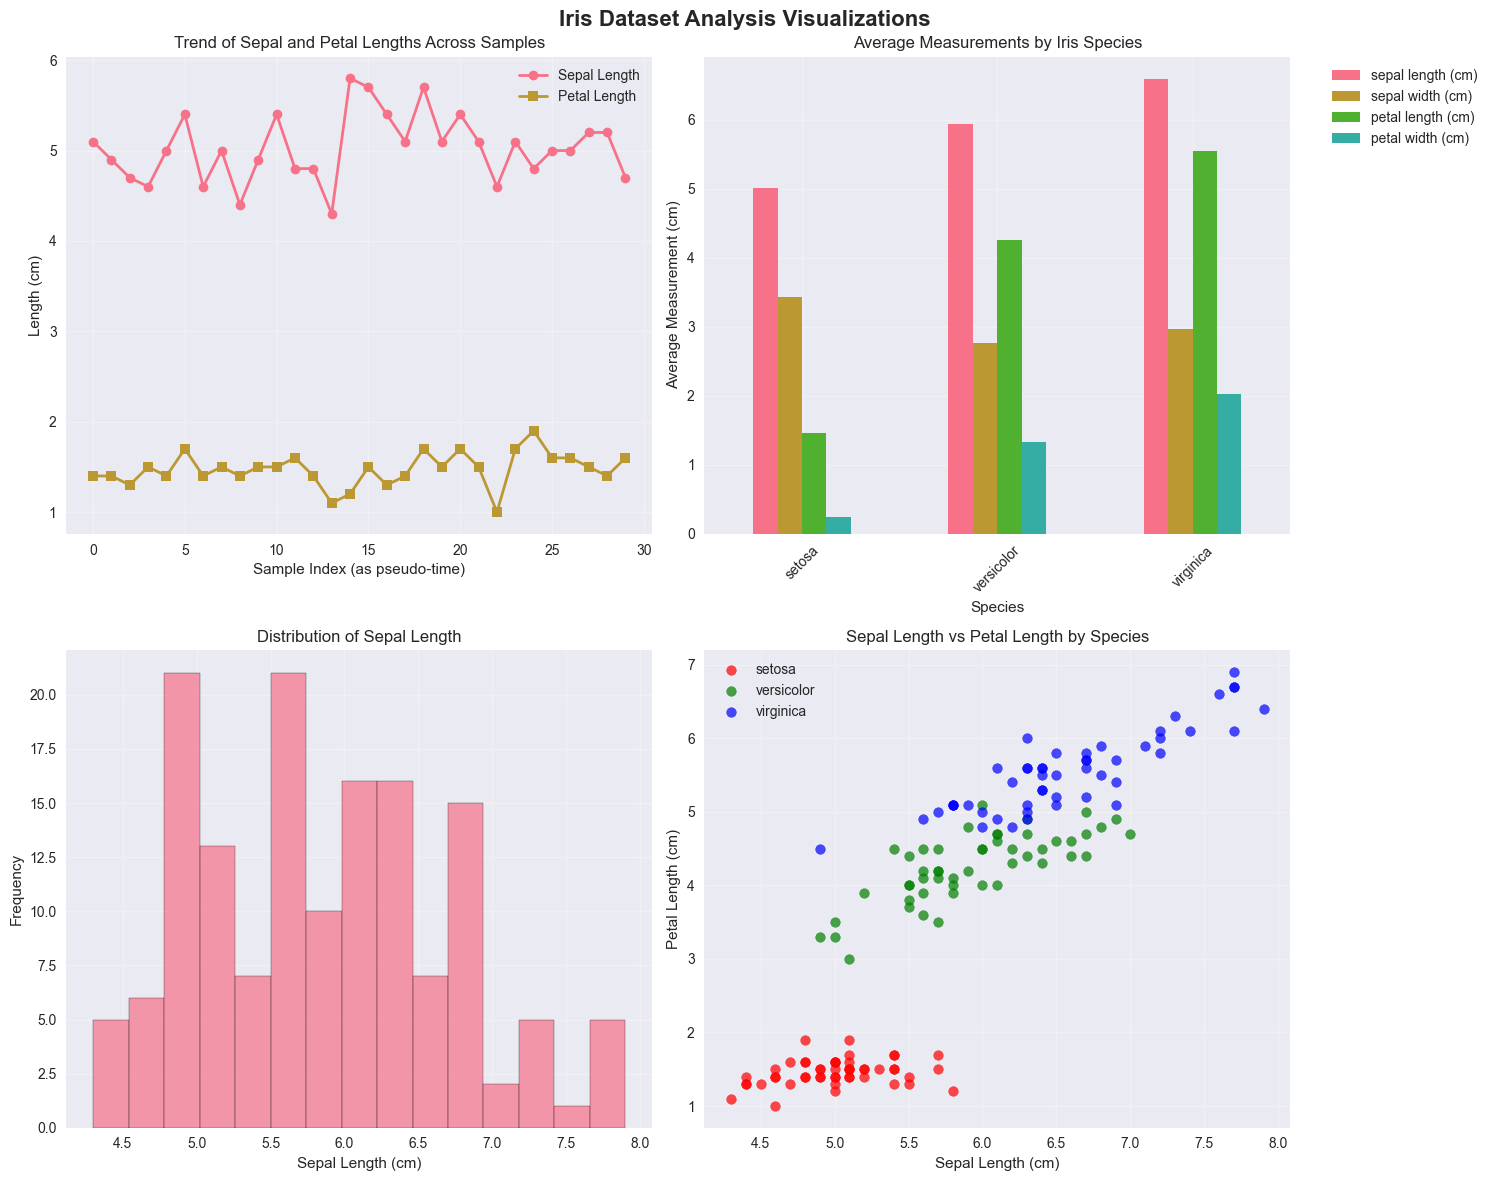


Additional Visualizations:


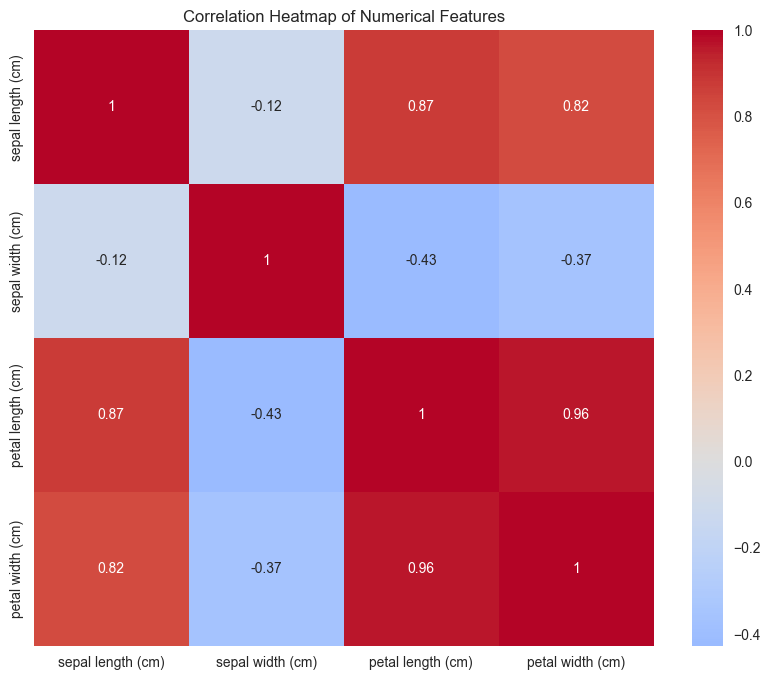

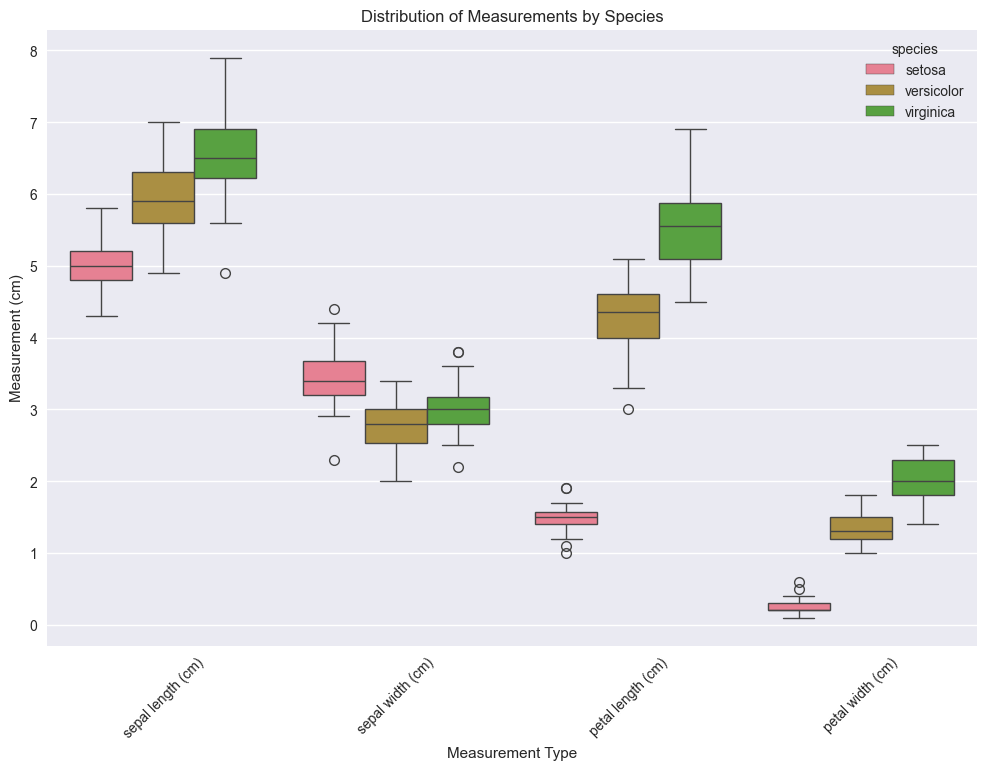


ANALYSIS COMPLETE!
Key Insights:
1. Clear separation between species, especially in petal measurements
2. Strong positive correlation between petal length and width
3. Setosa species is distinctly different from versicolor and virginica
4. Virginica has the largest overall measurements


In [3]:
print("\n" + "="*50)
print("TASK 3: DATA VISUALIZATION")
print("="*50)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Iris Dataset Analysis Visualizations', fontsize=16, fontweight='bold')

plt.subplot(2, 2, 1)
df_sample = df.head(30)
plt.plot(df_sample.index, df_sample['sepal length (cm)'], marker='o', label='Sepal Length', linewidth=2)
plt.plot(df_sample.index, df_sample['petal length (cm)'], marker='s', label='Petal Length', linewidth=2)
plt.xlabel('Sample Index (as pseudo-time)')
plt.ylabel('Length (cm)')
plt.title('Trend of Sepal and Petal Lengths Across Samples')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
species_means.plot(kind='bar', ax=axes[0, 1])
plt.title('Average Measurements by Iris Species')
plt.xlabel('Species')
plt.ylabel('Average Measurement (cm)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)


plt.subplot(2, 2, 3)
df['sepal length (cm)'].hist(bins=15, alpha=0.7, edgecolor='black')
plt.title('Distribution of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 4)
colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
for species, color in colors.items():
    species_data = df[df['species'] == species]
    plt.scatter(species_data['sepal length (cm)'], 
                species_data['petal length (cm)'], 
                alpha=0.7, 
                label=species, 
                color=color)
plt.title('Sepal Length vs Petal Length by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
print("\nAdditional Visualizations:")

plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

plt.figure(figsize=(12, 8))
df_melted = pd.melt(df, id_vars=['species'], value_vars=iris.feature_names)
sns.boxplot(x='variable', y='value', hue='species', data=df_melted)
plt.title('Distribution of Measurements by Species')
plt.xlabel('Measurement Type')
plt.ylabel('Measurement (cm)')
plt.xticks(rotation=45)
plt.show()

print("\n" + "="*50)
print("ANALYSIS COMPLETE!")
print("="*50)
print("Key Insights:")
print("1. Clear separation between species, especially in petal measurements")
print("2. Strong positive correlation between petal length and width")
print("3. Setosa species is distinctly different from versicolor and virginica")
print("4. Virginica has the largest overall measurements")
